In [20]:
from begepro.autoencoder.sn_analysis import Comparison, compute_threshold
from begepro.autoencoder.dataloading import DataLoader, Dataset
from begepro.autoencoder.autoencoder_classifier import Autoencoder, Classifier

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
opts = {"loadpath": "/mnt/e/BEGE_data/waveforms_232Th", # where .bin files are stored
"savepath": "../../dataset/Th232", # where .npy files will be saved with readfiles() and loaded with load()
"subsampling_factor": 3}
dataloader = DataLoader(opts)
waveforms, currents, energies, amplitudes, pulse_height = dataloader.load()


In [6]:
autoencoder_class = Autoencoder()
classifier_class = Classifier(input_size = 5)
autoencoder_class.load_model("../../models/autoencoder", "../../models/encoder")
autoencoder = autoencoder_class.autoencoder
encoder = autoencoder_class.encoder

In [7]:
predictions, mus, stds = autoencoder_class.encode(waveforms)

2023-02-07 15:08:25.750357: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 971120000 exceeds 10% of free system memory.


62188/62188 [==============================] - 53s 850us/step


In [12]:
opts = {"loadpath": "/mnt/e/BEGE_data/waveforms_crioconite", # where .bin files are stored
"savepath": "../../dataset/crioconite", # where .npy files will be saved with readfiles() and loaded with load()
"subsampling_factor": 3}
dataloader = DataLoader(opts)

waveforms, currents, energies, amplitudes, pulse_height = dataloader.load()

autoencoder_class = Autoencoder()
classifier_class = Classifier(input_size = 5)
autoencoder_class.load_model("../../models/autoencoder", "../../models/encoder")
classifier_class.load_model("../../models/classifier")

In [13]:
predictions, _, _ = autoencoder_class.encode(waveforms, mus, stds)

   57/46875 [..............................] - ETA: 42s    

2023-02-07 15:11:48.381026: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 732000000 exceeds 10% of free system memory.


46875/46875 [==============================] - 41s 867us/step


In [15]:
scores = classifier_class.classifier.predict(predictions)

46875/46875 [==============================] - 38s 808us/step


In [16]:
avse = amplitudes/pulse_height

In [78]:
predictions_nn = scores[:,0] > 0.35
avse_threshold = compute_threshold(avse, predictions_nn.sum(), "avse", stress_limit = 100000)
print(avse_threshold)

0.01801778494335013


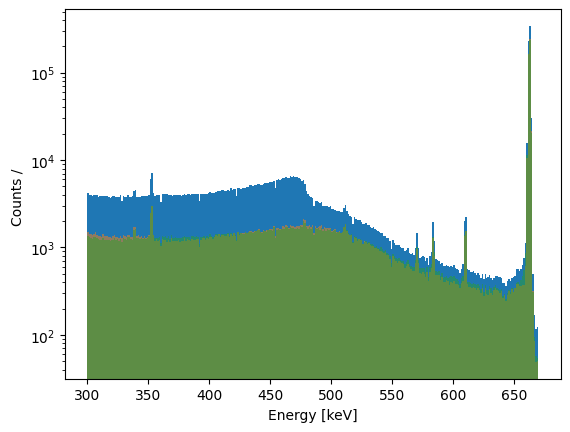

In [117]:
nbins = 303
plt.hist(energies, range = [300, 670], bins = nbins)[-1]
plt.hist(energies[predictions_nn], range = [300, 670], bins = nbins, alpha = 0.5)[-1]
plt.hist(energies[avse < avse_threshold], range = [300, 670], bins = nbins, alpha = 0.5)[-1]
plt.xlabel("Energy [keV]")
plt.ylabel("Counts / ")
plt.yscale("log")